# Housing Prices in Mumbai Estimator

## Hitaansh Shah - 21d180016
## Ojas Karanjkar - 210070040
## Omkar Nitsure - 210070057

In [1]:
import numpy as np                      # Importing Essential libraries

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import scipy

import statistics as st

## Reading csv file into a DataFrame

In [2]:
url = r"C:\Users\omkar\Downloads\house-price-mumbai.csv"
#url="https://raw.githubusercontent.com/omkarnitsureiitb/DS203-PROJECT/main/house-price-mumbai.csv?token=GHSAT0AAAAAABZOJ4ZFOBENA5O6HHQYLQRUY3TQLNA"
df = pd.read_csv(url)

display(df)

,BHK,project,Location,City,Total sqft,price_sqft,price
0,3 BHK Apartment,SHREE KRISHNA SangamChembur,Chembur,Mumbai,984,"31,000",3.05 Cr
1,2 BHK Apartment,Ekdanta 24 KaratKurla,Kurla,Mumbai,598,"23,913",1.42 Cr
2,2 BHK Apartment,Liberty Bay VueMalad West,Malad West,Mumbai,738,"21,000",1.54 Cr
3,3 BHK Apartment,Thalia Vrindavan FloraRasayani,Rasayani,Mumbai,644,"10,676",68.75 L
4,2 BHK Apartment,Mayfair The ViewVikhroli,Vikhroli,Mumbai,582,"24,914",1.45 Cr
...,...,...,...,...,...,...,...
3975,2 BHK Apartment,Global Prestige Wing EVasai,Vasai,Mumbai,966,"4,968",48 L
3976,1 BHK Apartment,Unicorn Unicorn Global ArenaNaigaon East,Naigaon East,Mumbai,500,"5,200",26 L
3977,1 BHK Apartment,Navkar Navkar CityNaigaon East,Naigaon East,Mumbai,610,"5,573",34 L
3978,1 BHK Apartment,Navkar City Phase I Part 3Naigaon East,Naigaon East,Mumbai,610,"5,245",32 L


## Exploratory Data Analysis

### Dropping Redundant Column

In [3]:
df.drop('City', axis=1,inplace=True)

display(df)

,BHK,project,Location,Total sqft,price_sqft,price
0,3 BHK Apartment,SHREE KRISHNA SangamChembur,Chembur,984,"31,000",3.05 Cr
1,2 BHK Apartment,Ekdanta 24 KaratKurla,Kurla,598,"23,913",1.42 Cr
2,2 BHK Apartment,Liberty Bay VueMalad West,Malad West,738,"21,000",1.54 Cr
3,3 BHK Apartment,Thalia Vrindavan FloraRasayani,Rasayani,644,"10,676",68.75 L
4,2 BHK Apartment,Mayfair The ViewVikhroli,Vikhroli,582,"24,914",1.45 Cr
...,...,...,...,...,...,...
3975,2 BHK Apartment,Global Prestige Wing EVasai,Vasai,966,"4,968",48 L
3976,1 BHK Apartment,Unicorn Unicorn Global ArenaNaigaon East,Naigaon East,500,"5,200",26 L
3977,1 BHK Apartment,Navkar Navkar CityNaigaon East,Naigaon East,610,"5,573",34 L
3978,1 BHK Apartment,Navkar City Phase I Part 3Naigaon East,Naigaon East,610,"5,245",32 L


### Finding the total number of rows and columns in the csv data file

In [4]:
no_of_rows = df.shape[0]

no_of_columns = df.shape[1]

print('Dataframe number of rows = '+str(no_of_rows))
print('Dataframe number of columns = '+str(no_of_columns))

Dataframe number of rows = 3980
Dataframe number of columns = 6


### Replacing Incomplete entries with proper entries

In [5]:
df = df.replace(np.nan, 0)

df = df.replace('1 BHK Apartment', '1')

df = df.replace('2 BHK Apartment', '2')

df = df.replace('3 BHK Apartment', '3')

df = df.replace('4 BHK Apartment', '4')

df = df.replace('5 BHK Apartment', '5')

df = df.replace('6 BHK Apartment', '6')

df = df.replace('R', 'One Room')

### Removing commas in 'price_sqft' column and changing it's datatype

In [6]:
df_ = df['price_sqft'].to_list()                
df.drop('price_sqft', axis=1,inplace=True)

for i in range(0,len(df_)):
    df_[i] = df_[i].replace(',', '')


df['price_sqft'] = df_

df['price_sqft'] = pd.to_numeric(df['price_sqft'])

display(df)

,BHK,project,Location,Total sqft,price,price_sqft
0,3,SHREE KRISHNA SangamChembur,Chembur,984,3.05 Cr,31000
1,2,Ekdanta 24 KaratKurla,Kurla,598,1.42 Cr,23913
2,2,Liberty Bay VueMalad West,Malad West,738,1.54 Cr,21000
3,3,Thalia Vrindavan FloraRasayani,Rasayani,644,68.75 L,10676
4,2,Mayfair The ViewVikhroli,Vikhroli,582,1.45 Cr,24914
...,...,...,...,...,...,...
3975,2,Global Prestige Wing EVasai,Vasai,966,48 L,4968
3976,1,Unicorn Unicorn Global ArenaNaigaon East,Naigaon East,500,26 L,5200
3977,1,Navkar Navkar CityNaigaon East,Naigaon East,610,34 L,5573
3978,1,Navkar City Phase I Part 3Naigaon East,Naigaon East,610,32 L,5245


### Finding total prices in Crores and changing Datatype of the column

In [7]:
df.drop('price', axis=1,inplace=True)

Total_sqft = df['Total sqft'].to_list()
price_sqft = df['price_sqft'].to_list()

price_in_Cr = []  

for index in range(0, no_of_rows):
    price_in_Cr.append(round(Total_sqft[index]*price_sqft[index]/10**7, 2))

df['price_in_Cr'] = price_in_Cr

display(df)

,BHK,project,Location,Total sqft,price_sqft,price_in_Cr
0,3,SHREE KRISHNA SangamChembur,Chembur,984,31000,3.05
1,2,Ekdanta 24 KaratKurla,Kurla,598,23913,1.43
2,2,Liberty Bay VueMalad West,Malad West,738,21000,1.55
3,3,Thalia Vrindavan FloraRasayani,Rasayani,644,10676,0.69
4,2,Mayfair The ViewVikhroli,Vikhroli,582,24914,1.45
...,...,...,...,...,...,...
3975,2,Global Prestige Wing EVasai,Vasai,966,4968,0.48
3976,1,Unicorn Unicorn Global ArenaNaigaon East,Naigaon East,500,5200,0.26
3977,1,Navkar Navkar CityNaigaon East,Naigaon East,610,5573,0.34
3978,1,Navkar City Phase I Part 3Naigaon East,Naigaon East,610,5245,0.32


### Finding Average price per sqft in Mumbai

In [8]:
Avg_price_sqft = np.mean(price_sqft)

print('Average price per sqft in Mumbai is ' + str(round(Avg_price_sqft/1000, 2)) + ' Thousand Rupees')

Average price per sqft in Mumbai is 11.94 Thousand Rupees


### Plotting barplot of number of houses for every price range in Mumbai

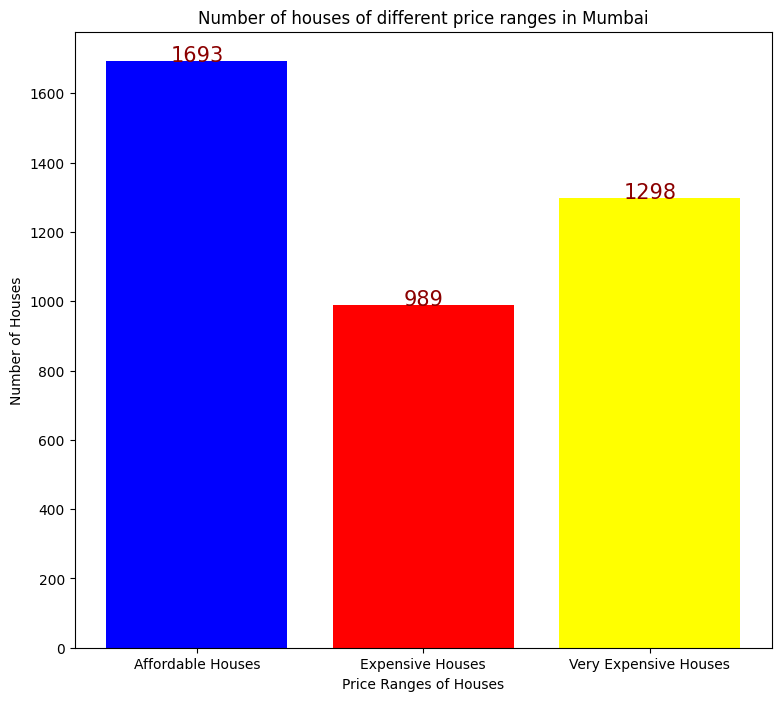

Mean price of houses in Mumbai is 1.12 Crore Rupees
Deviation in prices of houses in Mumbai is 1.71 Crore Rupees


In [9]:
affordable_houses = 0
expensive_houses = 0
very_expensive_houses = 0

price = df['price_in_Cr'].to_list()

mean_price = np.mean(price)
std_price = np.std(price)

# 50 lakh considered as the upper limit for affordable houses
for index in range(0, len(price)):
    if price[index] <= 0.5:
        affordable_houses += 1
    elif (price[index] > 0.5) and (price[index] <= 1.0):
        expensive_houses += 1
    else:
        very_expensive_houses += 1

price_categories = ['Affordable Houses', 'Expensive Houses', 'Very Expensive Houses']

frequency = [affordable_houses, expensive_houses, very_expensive_houses]
plt.figure(figsize=(9,8))

plt.bar(price_categories, frequency, color=['Blue','Red','Yellow'])

plt.xlabel('Price Ranges of Houses')

plt.ylabel('Number of Houses')

plt.title('Number of houses of different price ranges in Mumbai')


for index in range(len(price_categories)):
    plt.text(index, frequency[index], frequency[index], ha='center', color='darkred',size=15)

plt.show()

print('Mean price of houses in Mumbai is ' + str(round(mean_price, 2)) + ' Crore Rupees')

print('Deviation in prices of houses in Mumbai is ' + str(round(std_price, 2)) + ' Crore Rupees')

### Plotting barplot of number of houses of different sizes in Mumbai

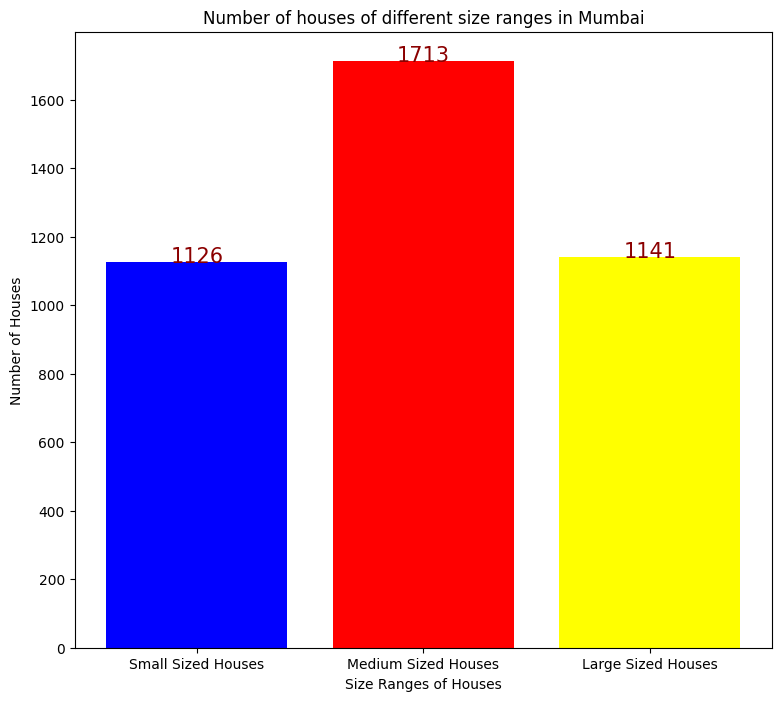

Mean size of houses in Mumbai is 895 sqft
Deviation in size of houses in Mumbai is 689 sqft


In [10]:
small_houses = 0
medium_houses = 0
large_houses = 0

house_size = df['Total sqft'].to_list()

mean_size = np.mean(house_size)
std_size = np.std(house_size)

for index in range(0, len(house_size)):
    if house_size[index] <= 600:
        small_houses += 1
    elif (house_size[index] > 600) and (house_size[index] <= 1000):
        medium_houses += 1
    else:
         large_houses += 1

house_size = ['Small Sized Houses', 'Medium Sized Houses', 'Large Sized Houses']

frequency = [small_houses, medium_houses, large_houses]
plt.figure(figsize=(9,8))
plt.bar(house_size, frequency, color=['Blue','Red','Yellow'])

plt.xlabel('Size Ranges of Houses')

plt.ylabel('Number of Houses')

plt.title('Number of houses of different size ranges in Mumbai')

for index in range(len(house_size)):
    plt.text(index, frequency[index], frequency[index], ha='center', color='darkred',size=15)

plt.show()

print('Mean size of houses in Mumbai is ' + str(round(mean_size)) + ' sqft')

print('Deviation in size of houses in Mumbai is ' + str(round(std_size)) + ' sqft')

### Plotting barplot of number of houses with different prices/sqft in Mumbai

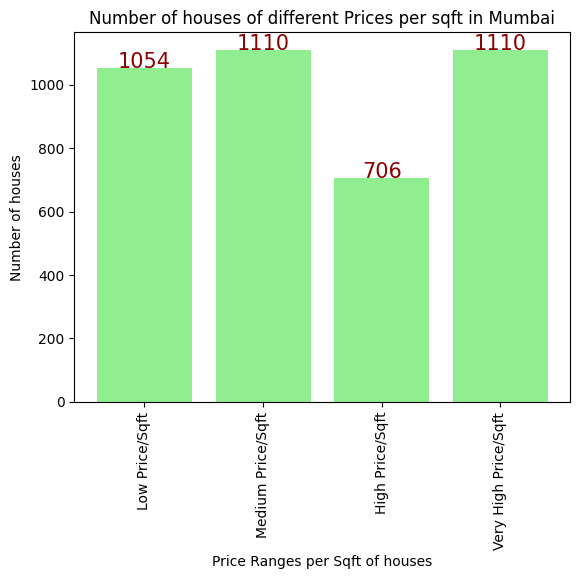

Mean price/sqft in Mumbai is 11938 Rupees
Deviation in price/sqft in Mumbai is 10153 Rupees


In [11]:
low_price_sqft = 0
medium_price_sqft = 0
high_price_sqft = 0
very_high_price_sqft = 0

mean_price_sqft = np.mean(price_sqft)
std_price_sqft = np.std(price_sqft)

for index in range(0, len(price_sqft)):
    if price_sqft[index] <= 5000:
        low_price_sqft += 1
    elif (price_sqft[index] > 5000) and (price_sqft[index] <= 10000):
        medium_price_sqft += 1
    elif (price_sqft[index] > 10000) and (price_sqft[index] <= 15000):
        high_price_sqft += 1
    else:
        very_high_price_sqft += 1

price_sqft_categories = ['Low Price/Sqft', 'Medium Price/Sqft', 'High Price/Sqft', 'Very High Price/Sqft']

frequency = [low_price_sqft, medium_price_sqft, high_price_sqft, very_high_price_sqft]
#plt.figure(figsize=(10,8))
plt.bar(price_sqft_categories, frequency, color='lightgreen')

plt.xlabel('Price Ranges per Sqft of houses')

plt.xticks(rotation=90)

plt.ylabel('Number of houses')

plt.title('Number of houses of different Prices per sqft in Mumbai')

for index in range(len(price_sqft_categories)):
    plt.text(index, frequency[index], frequency[index], ha='center', color='darkred',size=15)

plt.show()

print('Mean price/sqft in Mumbai is ' + str(round(mean_price_sqft)) + ' Rupees')

print('Deviation in price/sqft in Mumbai is ' + str(round(std_price_sqft)) + ' Rupees')

### Classifying Location in broad Regions

In [12]:
North_Mumbai = ['Malad West', 'Palghar', 'Malad East', 'Jogeshwari West', 'Dahisar', 'Borivali East', 'Vasai', 'Andheri West', 'Goregaon East','Andheri East','Umroli','Virar','Kandivali West','Mira Road East','Vasai east','Wada','Santosh Nagar','Virar East','Gorai','Virar West','Nala Sopara','Vasai West','Borivali West','Goregaon West','Bandra West','Nalasopara West','Bhayandar West','Boisar','Bhayandar East','Jogeshwari East','Uttan','Kandivali East','Vevoor','Nalasopara East','Ville Parle East','Dahisar East','Juhu','Dahisar West','Bandra East','Naigaon West','Naigaon East','Khar West','Saphale','Shir Gaon','Dahanu','Kharodi','Bandra Kurla Complex','Khar']
South_Mumbai = ['Colaba','Agripada','Mandvi','Kamathipura','Parel','Girgaon','Mumbai Central','Napeansea Road','Prabhadevi','Cuffe Parade','Lower Parel','Peddar Road','Worli','Madanpura','Bhuleshwar','Fort']
Central_Mumbai = ['Kurla','Vikhroli','Mahim','Dombivali','Mulund West','Ambernath East','Karjat','Khopoli','Kalyan West','Kalyan East','Thane West','Shahapur','Badlapur East','Titwala','Diva','Bhiwandi','Powai','Badlapur West','kasaradavali thane west','Dombivali East','Dadar East','Sion','Kalwa','Hendre Pada','Kumbharkhan Pada','Ghatkopar West','Khadawali','Mulund East','Kanjurmarg','Anjurdive','matunga east','Dharamveer Nagar','Diva Gaon','Dombivli (West)','Thakurli','Bhandup West','Vikhroli West','Ghatkopar East','Kanjurmarg East','Kurla West','Palava','New Balaji Nagar','Vasind','Ambivli','Navapada','Kurla East','Ambernath West','Dadar West','Vishnu Nagar','Nilje Gaon','Vikroli East','Beturkar Pada','Ghodbander','Datiwali Gaon','Shil Phata','Vashi','Ulhasnagar','LBS Marg','Hiranandani Estates','Bhandup East','Atgaon','Nahur East','Usarghar Gaon','Kasheli','Thane East']
Harbour_Mumbai = ['Chembur','Kharghar','Santacruz East','Mazagaon','Panvel','Santacruz West','Mazgaon','Belapur','Sanpada','Sewri','Byculla','Wadala','Masjid Bandar','Deonar','Matunga','Dighe']
Navi_Mumbai = ['Rasayani','Dronagiri','Taloja','Ulwe','Kamothe','Nerul','Kalamboli','Karanjade','Navade','Airoli','Vichumbe','Belondakhar','Koper Khairane','Taloje','Dundare','Pale Bk.','Seawoods','Greater Khanda','Koproli','Ranjanpada Uran Panvel Road','Rabale','Ghansoli','Dahisar Navi mumbai','Sarde','Sector-20 Koparkhairane']
Raigadh = ['Vangani','Bhangarwadi','Shelu','Neral']

### Creating separate DataFrames for individual Broad Regions

In [13]:
df_NM = pd.DataFrame()
df_SM = pd.DataFrame()
df_CM = pd.DataFrame()
df_HM = pd.DataFrame()
df_NvM = pd.DataFrame()
df_R = pd.DataFrame()


for areas in North_Mumbai:
    df_temp = df[df['Location'] == areas]
    df_NM = pd.concat([df_NM, df_temp])

for areas in South_Mumbai:
    df_temp = df[df['Location'] == areas]
    df_SM = pd.concat([df_SM, df_temp])

for areas in Central_Mumbai:
    df_temp = df[df['Location'] == areas]
    df_CM = pd.concat([df_CM, df_temp])

for areas in Harbour_Mumbai:
    df_temp = df[df['Location'] == areas]
    df_HM = pd.concat([df_HM, df_temp])

for areas in Navi_Mumbai:
    df_temp = df[df['Location'] == areas]
    df_NvM = pd.concat([df_NvM, df_temp])

for areas in Raigadh:
    df_temp = df[df['Location'] == areas]
    df_R = pd.concat([df_R, df_temp])

Regions = ['North Mumbai', 'South Mumbai', 'Central Mumbai', 'Harbour Mumbai', 'Navi Mumbai', 'Raigadh']
DataFrames = [df_NM, df_SM, df_CM, df_HM, df_NvM, df_R]

for index in range(0, len(Regions)):
    print('DataFrame for the Region ' + Regions[index] + ' :-')
    display(DataFrames[index])

DataFrame for the Region North Mumbai :-


,BHK,project,Location,Total sqft,price_sqft,price_in_Cr
2,2,Liberty Bay VueMalad West,Malad West,738,21000,1.55
44,1,Sudarshan Sudarshan Lands EndMalad West,Malad West,469,19190,0.90
71,3,Liberty Bay VueMalad West,Malad West,999,21000,2.10
134,3,Liberty Bay VueMalad West,Malad West,1150,21000,2.42
135,1,Liberty Bay VueMalad West,Malad West,501,21000,1.05
...,...,...,...,...,...,...
2955,3,Kanakia ParisBandra Kurla Complex,Bandra Kurla Complex,986,37018,3.65
2956,2,Kanakia ParisBandra Kurla Complex,Bandra Kurla Complex,857,36989,3.17
2957,2,Kanakia ParisBandra Kurla Complex,Bandra Kurla Complex,845,36923,3.12
2777,3,Paradigm NivanKhar,Khar,1550,37741,5.85


DataFrame for the Region South Mumbai :-


,BHK,project,Location,Total sqft,price_sqft,price_in_Cr
263,1,0,Colaba,635,37795,2.40
596,1,0,Colaba,600,31666,1.90
1230,2,0,Colaba,1000,25000,2.50
1354,2,0,Colaba,1000,25000,2.50
272,1,0,Agripada,765,16993,1.30
...,...,...,...,...,...,...
3605,3,Vraj TiaraWorli,Worli,1500,46666,7.00
2703,3,Reputed Builder Sagar ClassicMadanpura,Madanpura,1650,28303,4.67
3414,1,0,Bhuleshwar,577,23396,1.35
7,2,Aplite Greenstone HeritageFort,Fort,671,40536,2.72


DataFrame for the Region Central Mumbai :-


,BHK,project,Location,Total sqft,price_sqft,price_in_Cr
1,2,Ekdanta 24 KaratKurla,Kurla,598,23913,1.43
14,1,Hirani Nehru Nagar Shree Ganesh Krupa CHS Ltd ...,Kurla,425,21591,0.92
70,1,Ekdanta 24 KaratKurla,Kurla,476,21968,1.05
79,2,Hirani Nehru Nagar Shree Ganesh Krupa CHS Ltd ...,Kurla,540,21425,1.16
133,1,Ekdanta 24 KaratKurla,Kurla,447,21973,0.98
...,...,...,...,...,...,...
3389,2,Neelam Senroofs Phase IIINahur East,Nahur East,838,20883,1.75
3295,2,Reputed Builder Regalia Casa BellaUsarghar Gaon,Usarghar Gaon,748,6149,0.46
3298,2,Ajay Bhav ResidencyKasheli,Kasheli,730,4041,0.29
3394,1,Godrej AscendThane East,Thane East,589,12903,0.76


DataFrame for the Region Harbour Mumbai :-


,BHK,project,Location,Total sqft,price_sqft,price_in_Cr
0,3,SHREE KRISHNA SangamChembur,Chembur,984,31000,3.05
41,1,Vardhan HeightsChembur,Chembur,320,21844,0.70
68,2,RRB Satra HarmonyChembur,Chembur,522,25692,1.34
69,3,SHREE KRISHNA SangamChembur,Chembur,917,31000,2.84
122,2,RRB Satra HarmonyChembur,Chembur,834,25692,2.14
...,...,...,...,...,...,...
875,1,0,Masjid Bandar,410,17073,0.70
1022,1,0,Masjid Bandar,410,17073,0.70
1498,1,Vinod Kisan ViharDeonar,Deonar,550,7254,0.40
1530,3,Raj Riddhi ResidencyMatunga,Matunga,1300,30692,3.99


DataFrame for the Region Navi Mumbai :-


,BHK,project,Location,Total sqft,price_sqft,price_in_Cr
3,3,Thalia Vrindavan FloraRasayani,Rasayani,644,10676,0.69
65,1,Today Belantara Rasayani,Rasayani,343,6851,0.23
72,1,Thalia Vrindavan FloraRasayani,Rasayani,320,8830,0.28
114,1,Today Belantara Rasayani,Rasayani,302,7052,0.21
115,2,Today Belantara Rasayani,Rasayani,514,6614,0.34
...,...,...,...,...,...,...
3588,One Room,0,Sarde,1089,367,0.04
3589,One Room,0,Sarde,1089,459,0.05
3930,One Room,0,Sarde,1089,321,0.03
3682,3,Sai Proviso ApartmentSector-20 Koparkhairane,Sector-20 Koparkhairane,1524,12467,1.90


DataFrame for the Region Raigadh :-


,BHK,project,Location,Total sqft,price_sqft,price_in_Cr
11,1,A Plus Golden VanVangani,Vangani,417,2578,0.11
24,1,Royal HeritageVangani,Vangani,395,4306,0.17
77,2,A Plus Golden VanVangani,Vangani,489,2699,0.13
177,1 RK Studio Apartment,A Plus Golden VanVangani,Vangani,241,2701,0.07
238,1,Royal HeritageVangani,Vangani,410,4243,0.17
275,1,Aries Aries Vangani HeightVangani,Vangani,450,19777,0.89
471,1,Royal HeritageVangani,Vangani,470,4255,0.20
472,2,Royal HeritageVangani,Vangani,553,4204,0.23
343,1,0,Bhangarwadi,674,4154,0.28
580,1,0,Shelu,520,2500,0.13


### Plotting barplots of number of houses for every price range in various Regions

Pie plot for the number of houses in different price ranges in Region North Mumbai :-
Mean price of houses in North Mumbai is 1.08 Crore Rupees
Deviation in prices of houses in North Mumbai is 1.99 Crore Rupees


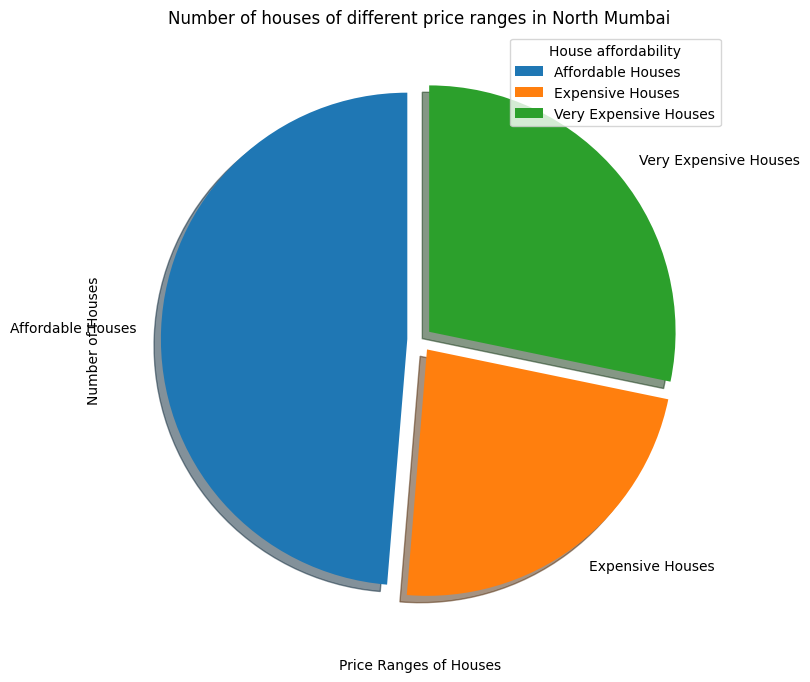

Pie plot for the number of houses in different price ranges in Region South Mumbai :-
Mean price of houses in South Mumbai is 4.95 Crore Rupees
Deviation in prices of houses in South Mumbai is 3.31 Crore Rupees


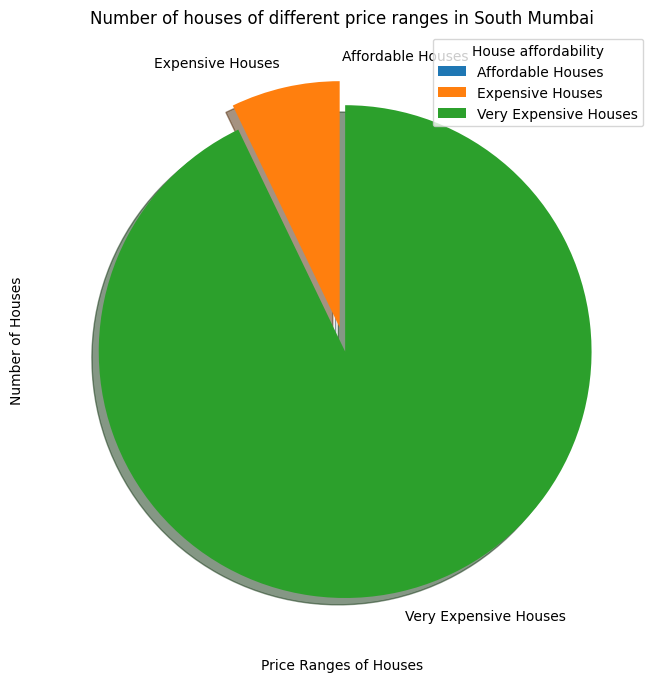

Pie plot for the number of houses in different price ranges in Region Central Mumbai :-
Mean price of houses in Central Mumbai is 0.89 Crore Rupees
Deviation in prices of houses in Central Mumbai is 0.91 Crore Rupees


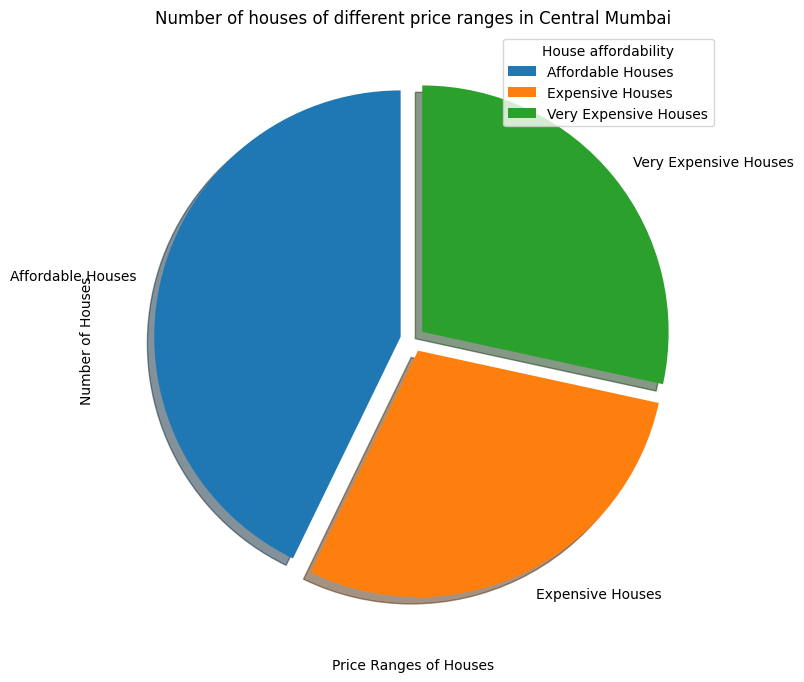

Pie plot for the number of houses in different price ranges in Region Harbour Mumbai :-
Mean price of houses in Harbour Mumbai is 1.8 Crore Rupees
Deviation in prices of houses in Harbour Mumbai is 1.56 Crore Rupees


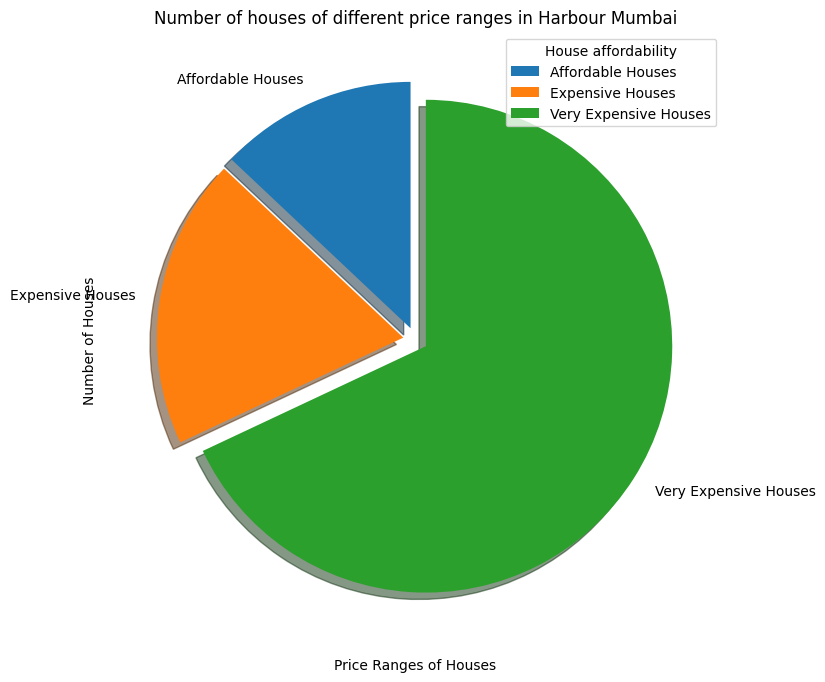

Pie plot for the number of houses in different price ranges in Region Navi Mumbai :-
Mean price of houses in Navi Mumbai is 0.87 Crore Rupees
Deviation in prices of houses in Navi Mumbai is 0.77 Crore Rupees


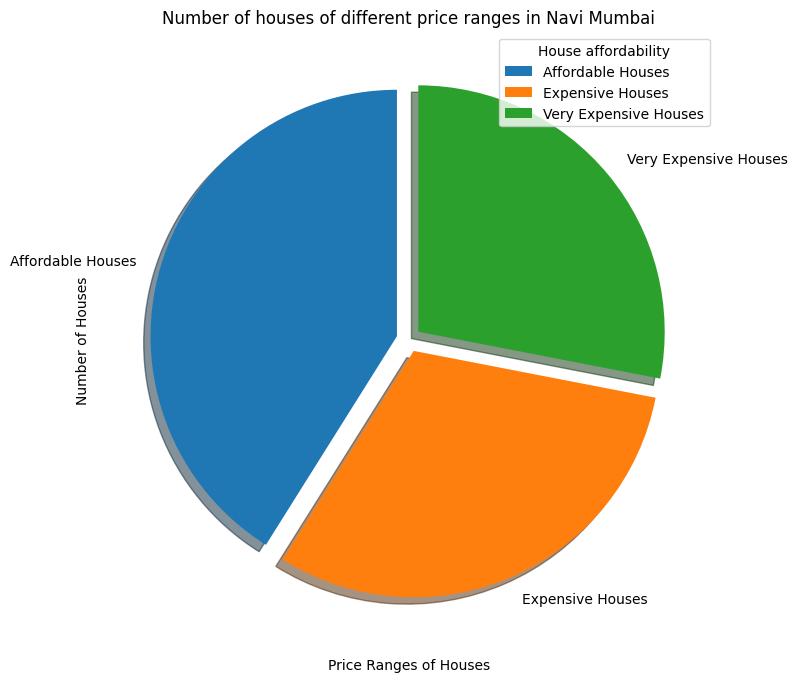

Pie plot for the number of houses in different price ranges in Region Raigadh :-
Mean price of houses in Raigadh is 0.24 Crore Rupees
Deviation in prices of houses in Raigadh is 0.18 Crore Rupees


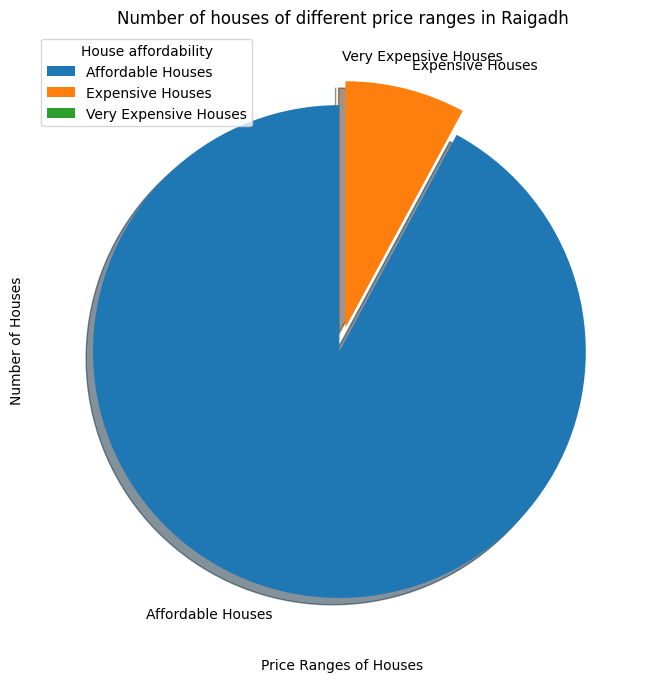

In [14]:
for index1 in range(0, len(Regions)):

    affordable_houses = 0
    expensive_houses = 0
    very_expensive_houses = 0

    price = DataFrames[index1]['price_in_Cr'].to_list()

    mean_price = np.mean(price)
    std_price = np.std(price)

    for index2 in range(0, len(price)):
        if price[index2] <= 0.5:
            affordable_houses += 1
        elif (price[index2] > 0.5) and (price[index2] <= 1.0):
            expensive_houses += 1
        else:
            very_expensive_houses += 1

    price_categories = ['Affordable Houses', 'Expensive Houses', 'Very Expensive Houses']

    frequency = [affordable_houses, expensive_houses, very_expensive_houses]

    print('Pie plot for the number of houses in different price ranges in Region ' + Regions[index1] + ' :-')

    print('Mean price of houses in ' + Regions[index1] + ' is ' + str(round(mean_price, 2)) + ' Crore Rupees')

    print('Deviation in prices of houses in ' + Regions[index1] + ' is ' + str(round(std_price, 2)) + ' Crore Rupees')
    plt.figure(figsize=(9,8))
    myexplode = [0.05,0.05,0.05]
 
    plt.pie(frequency,labels=price_categories,explode=myexplode,shadow=True, startangle=90)

    plt.xlabel('Price Ranges of Houses')

    plt.ylabel('Number of Houses')

    plt.title('Number of houses of different price ranges in ' + Regions[index1])
    plt.legend(title="House affordability")

    #for index2 in range(len(price_categories)):
        #plt.text(index2, frequency[index2], frequency[index2], ha='center', color='darkred',size=15)

    plt.show()

### Plotting barplots of number of houses of different sizes in various Regions

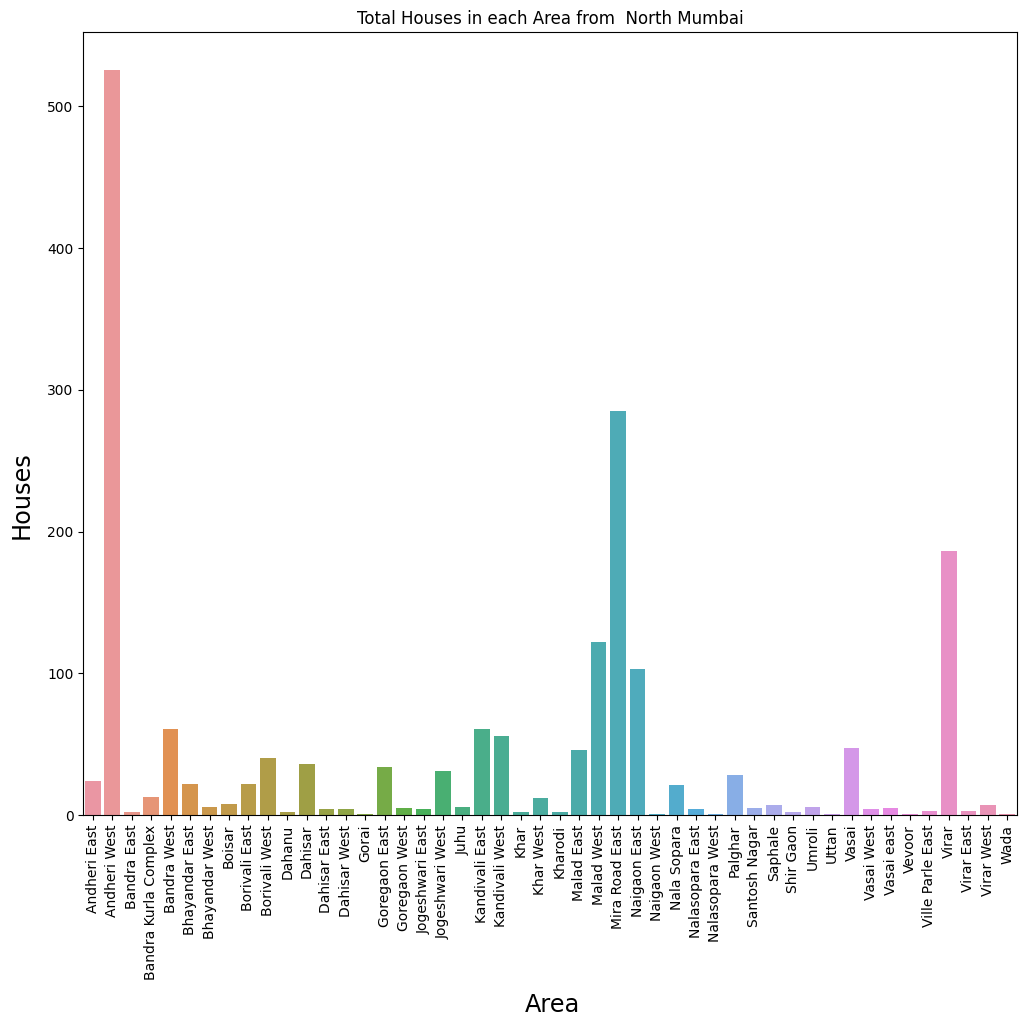

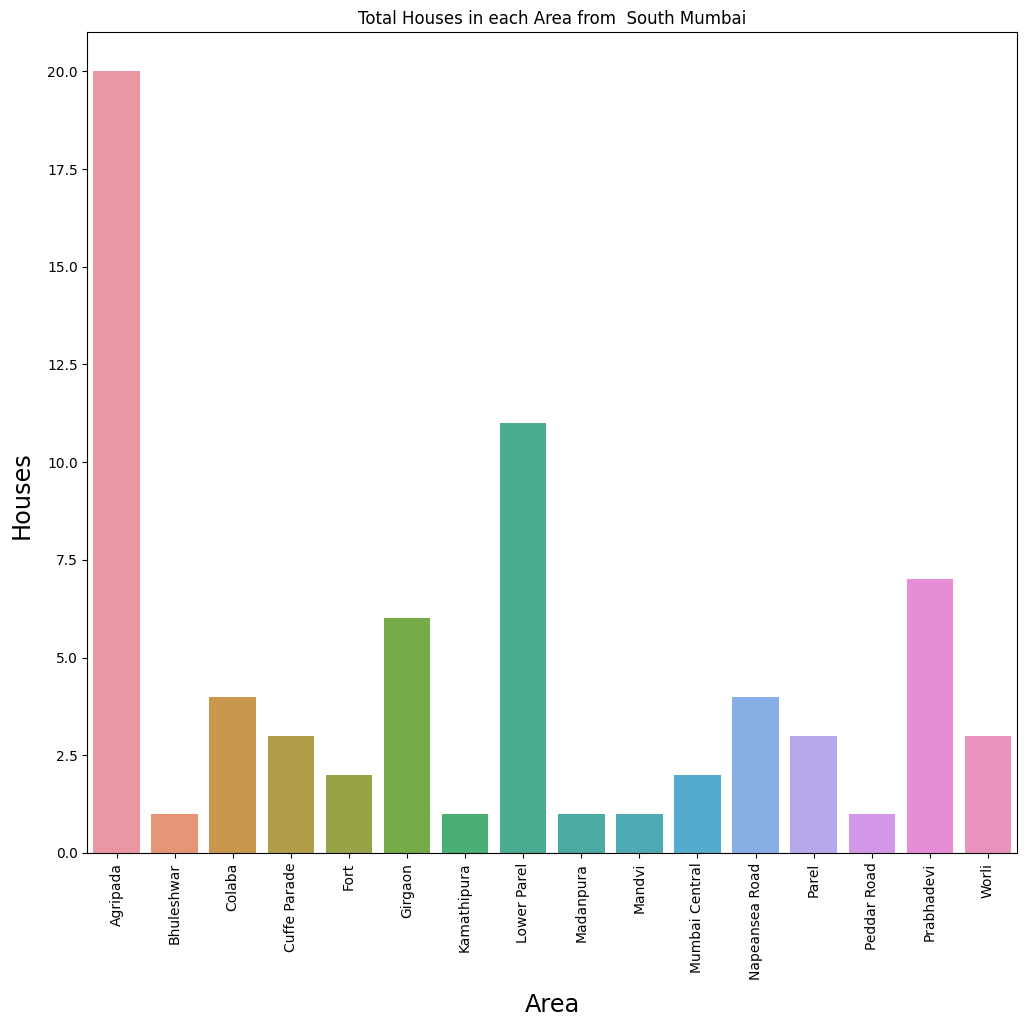

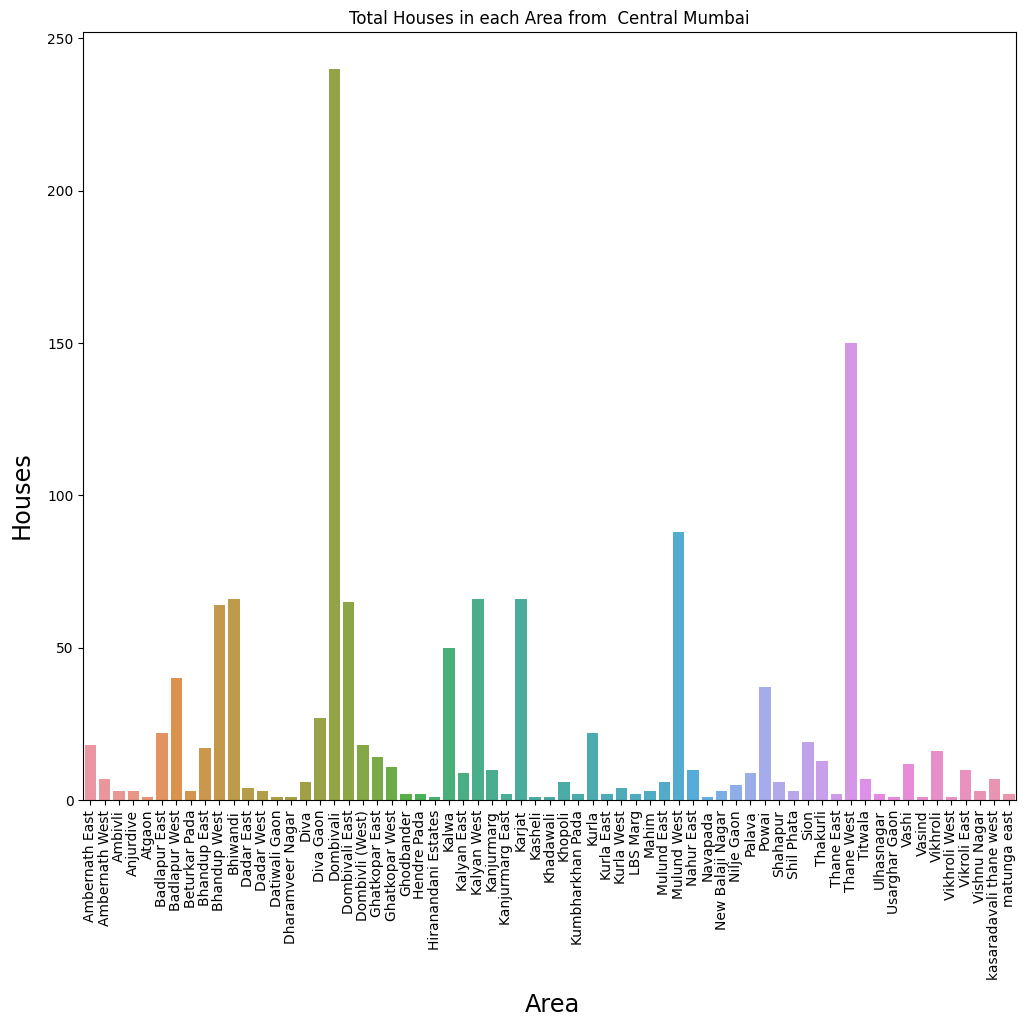

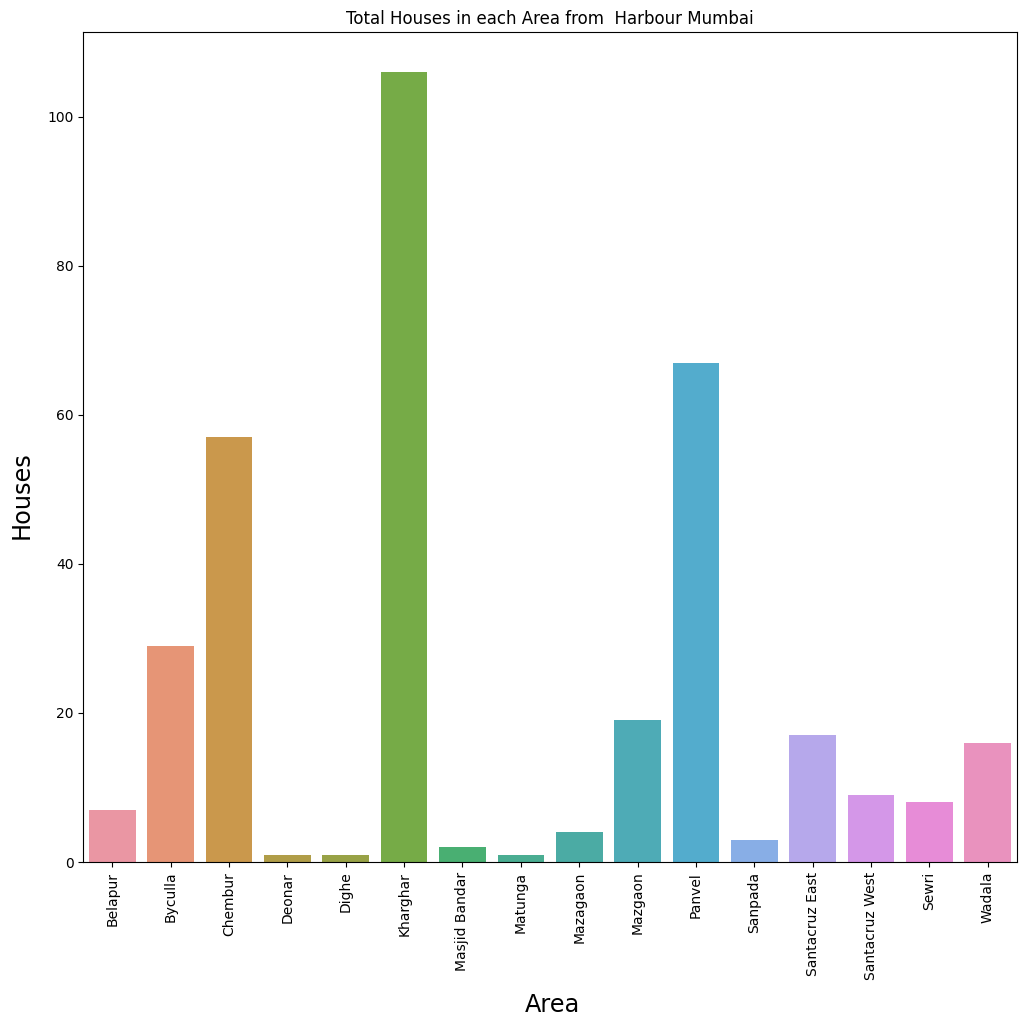

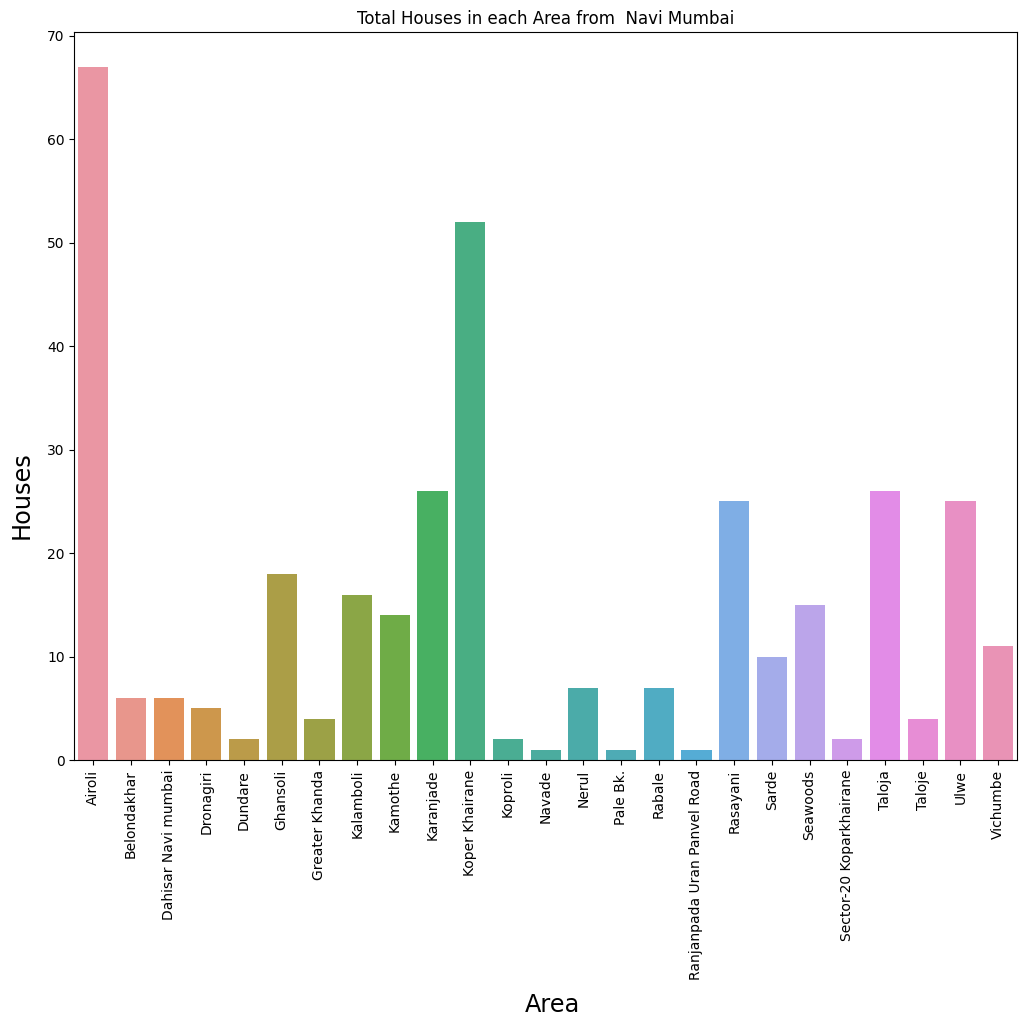

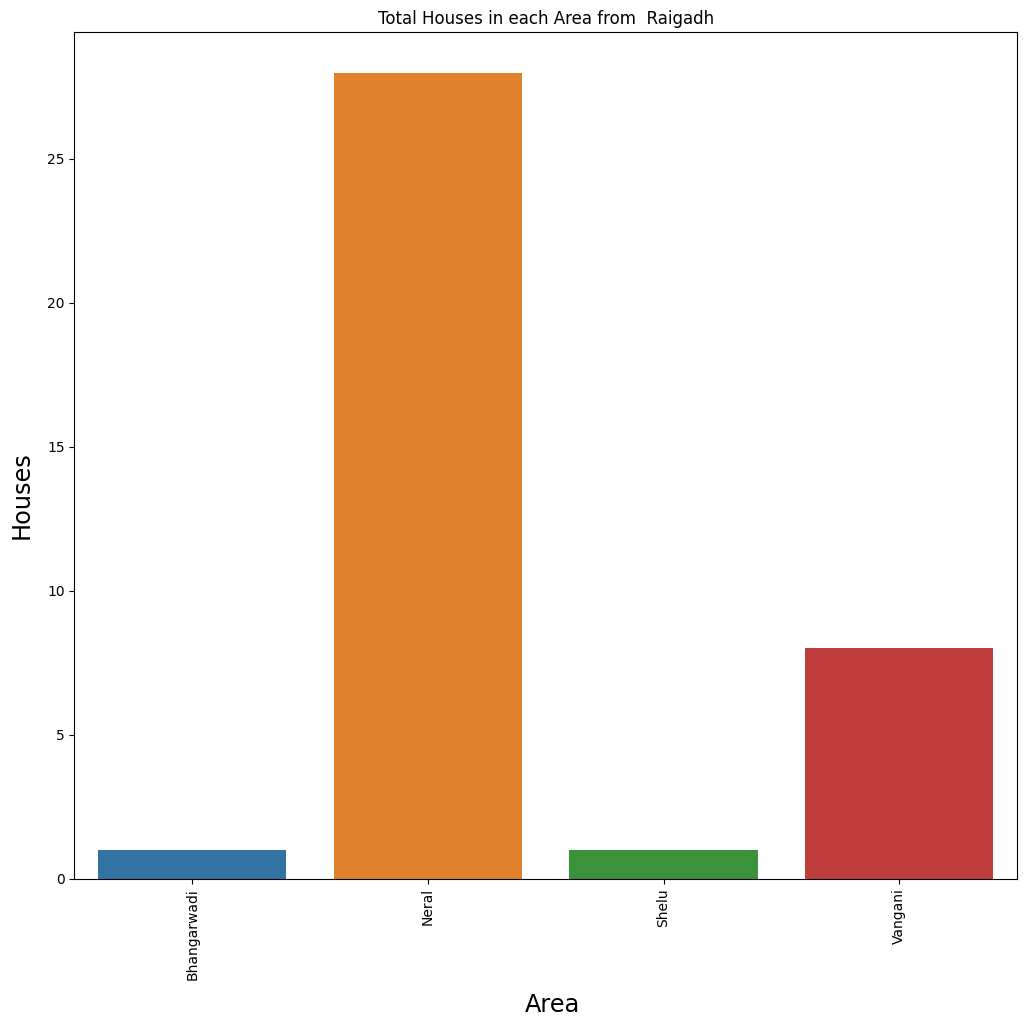

In [15]:
for region in range(len(Regions)):

    heights = []
    df_temp = DataFrames[region]
    areas = df_temp['Location'].unique()
    areas.sort()

    for loc in range(len(areas)):
        df_temp1 = df_temp[df_temp['Location'] == areas[loc]]
        heights.append(len(df_temp1))

    f=plt.figure(figsize=(10,10))
        
    ax = sns.barplot(x=areas,y=heights)
    ax.set(xlabel='')
    plt.title(region,weight='bold')

    #adding a common x and y label
    plt.xticks(range(len(heights)),areas, rotation='vertical')
    plt.title("Total Houses in each Area from  " + Regions[region])
    
    f.text(0.52,-0.01, "Area", ha="center", va="center",size='xx-large')
    f.text(-0.01,0.50, "Houses", ha="center", va="center", rotation=90,size='xx-large')

    plt.tight_layout()
    plt.show()   

Bar plot for the number of houses in different size ranges in Region North Mumbai :-
Mean size of houses in North Mumbai is 926 sqft
Deviation in size of houses in North Mumbai is 844 sqft


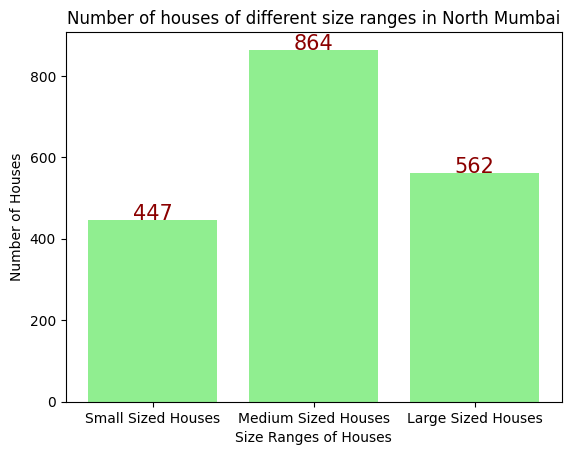

Bar plot for the number of houses in different size ranges in Region South Mumbai :-
Mean size of houses in South Mumbai is 1380 sqft
Deviation in size of houses in South Mumbai is 808 sqft


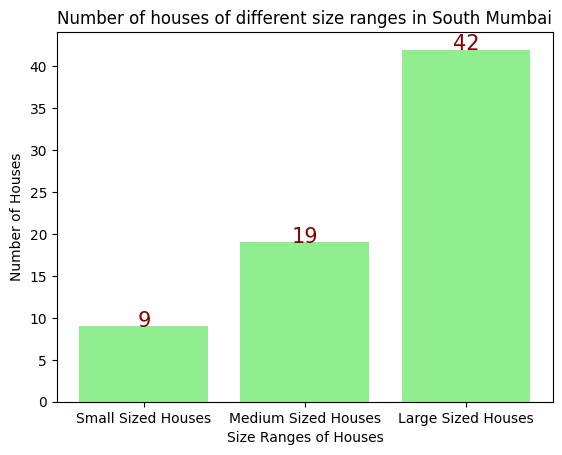

Bar plot for the number of houses in different size ranges in Region Central Mumbai :-
Mean size of houses in Central Mumbai is 804 sqft
Deviation in size of houses in Central Mumbai is 484 sqft


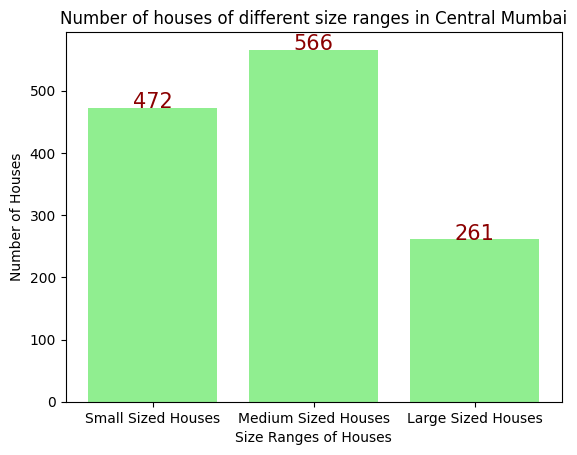

Bar plot for the number of houses in different size ranges in Region Harbour Mumbai :-
Mean size of houses in Harbour Mumbai is 1022 sqft
Deviation in size of houses in Harbour Mumbai is 513 sqft


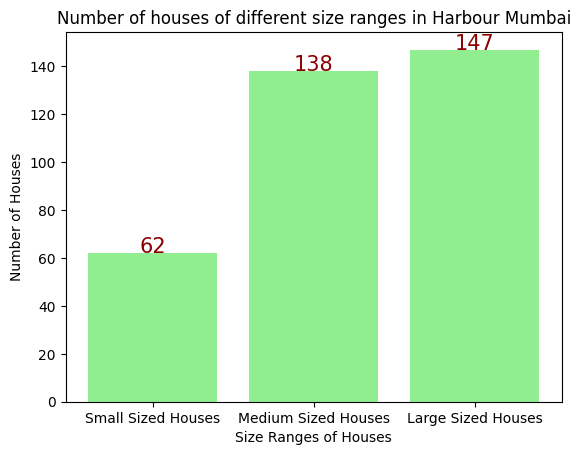

Bar plot for the number of houses in different size ranges in Region Navi Mumbai :-
Mean size of houses in Navi Mumbai is 891 sqft
Deviation in size of houses in Navi Mumbai is 444 sqft


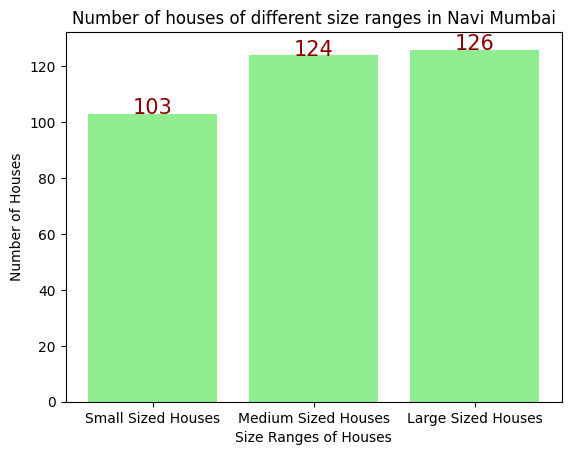

Bar plot for the number of houses in different size ranges in Region Raigadh :-
Mean size of houses in Raigadh is 509 sqft
Deviation in size of houses in Raigadh is 280 sqft


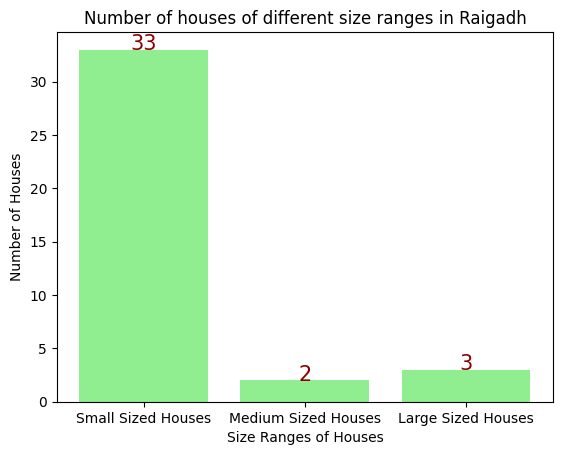

In [16]:
for index1 in range(0, len(Regions)):

    small_houses = 0
    medium_houses = 0
    large_houses = 0

    house_size = DataFrames[index1]['Total sqft'].to_list()

    mean_size = np.mean(house_size)
    std_size = np.std(house_size)

    for index2 in range(0, len(house_size)):
        if house_size[index2] <= 600:
            small_houses += 1
        elif (house_size[index2] > 600) and (house_size[index2] <= 1000):
            medium_houses += 1
        else:
            large_houses += 1

    house_size = ['Small Sized Houses', 'Medium Sized Houses', 'Large Sized Houses']

    frequency = [small_houses, medium_houses, large_houses]

    print('Bar plot for the number of houses in different size ranges in Region ' + Regions[index1] + ' :-')
    
    print('Mean size of houses in ' + Regions[index1] + ' is ' + str(round(mean_size)) + ' sqft')

    print('Deviation in size of houses in ' + Regions[index1] + ' is ' + str(round(std_size)) + ' sqft')
    #plt.figure(figsize=(10,8))
    plt.bar(house_size, frequency, color='lightgreen')

    plt.xlabel('Size Ranges of Houses')

    plt.ylabel('Number of Houses')

    plt.title('Number of houses of different size ranges in ' + Regions[index1])

    for index2 in range(len(house_size)):
        plt.text(index2, frequency[index2], frequency[index2], ha='center', color='darkred',size=15)

    plt.show()

### Plotting barplot of number of houses with different prices/sqft in various Regions

Bar plot for the number of houses in different price/sqft ranges in Region North Mumbai :-
Mean price/sqft in North Mumbai is 11672 Rupees
Deviation in price/sqft in North Mumbai is 11022 Rupees


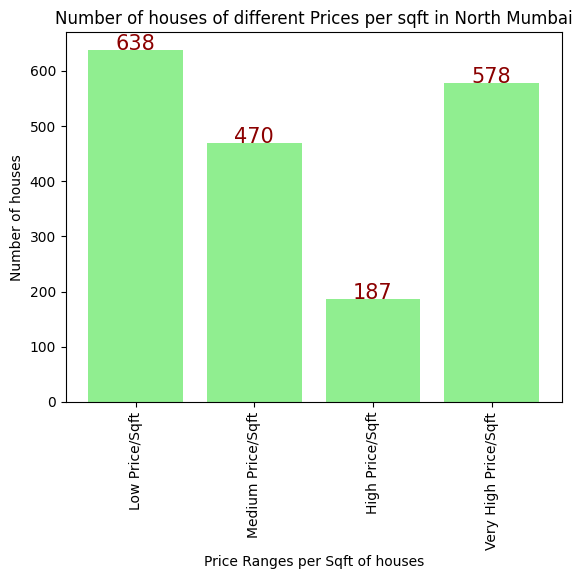

Bar plot for the number of houses in different price/sqft ranges in Region South Mumbai :-
Mean price/sqft in South Mumbai is 35289 Rupees
Deviation in price/sqft in South Mumbai is 11603 Rupees


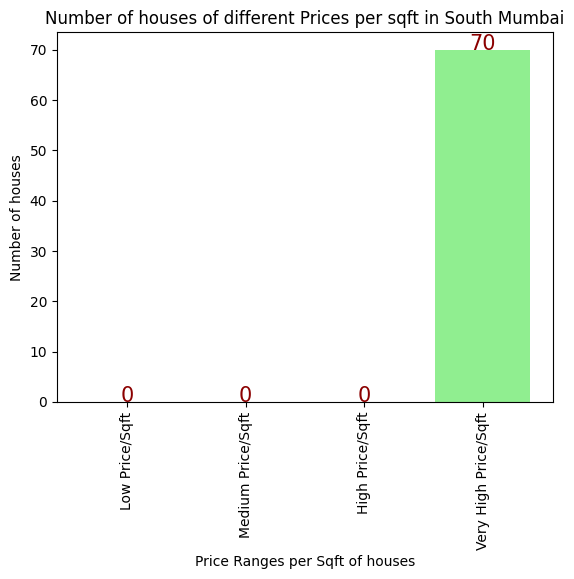

Bar plot for the number of houses in different price/sqft ranges in Region Central Mumbai :-
Mean price/sqft in Central Mumbai is 10444 Rupees
Deviation in price/sqft in Central Mumbai is 7135 Rupees


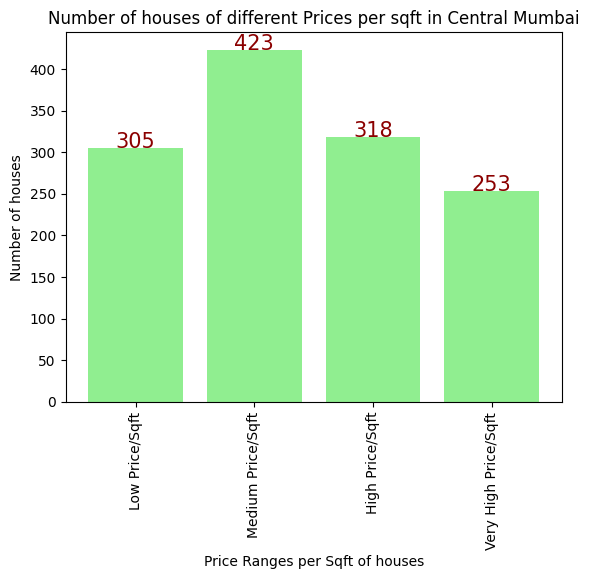

Bar plot for the number of houses in different price/sqft ranges in Region Harbour Mumbai :-
Mean price/sqft in Harbour Mumbai is 17732 Rupees
Deviation in price/sqft in Harbour Mumbai is 10843 Rupees


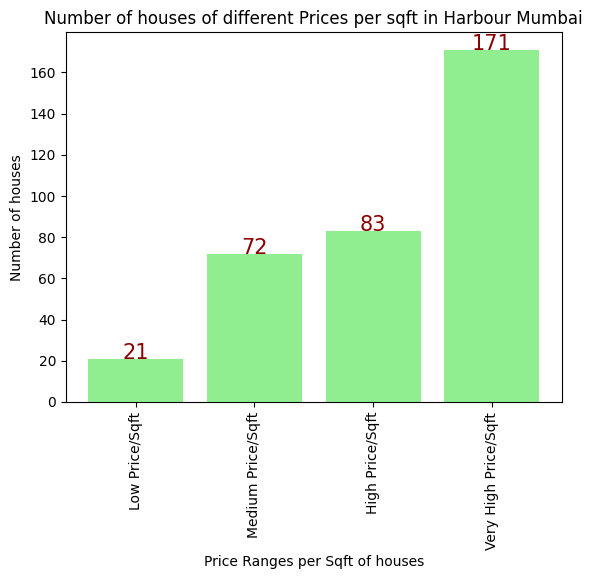

Bar plot for the number of houses in different price/sqft ranges in Region Navi Mumbai :-
Mean price/sqft in Navi Mumbai is 9308 Rupees
Deviation in price/sqft in Navi Mumbai is 4995 Rupees


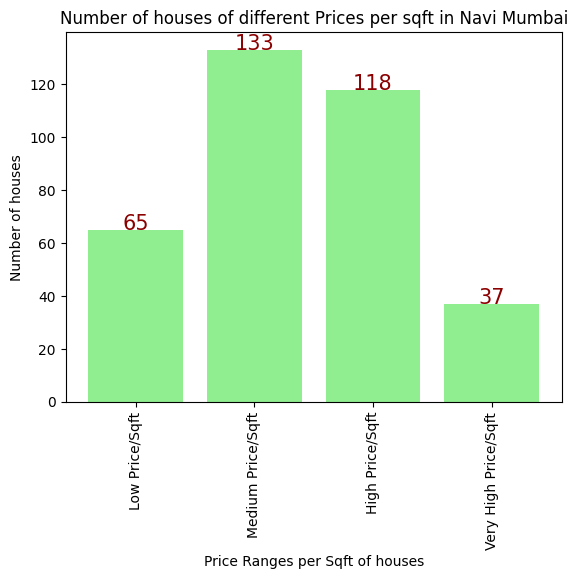

Bar plot for the number of houses in different price/sqft ranges in Region Raigadh :-
Mean price/sqft in Raigadh is 4677 Rupees
Deviation in price/sqft in Raigadh is 2708 Rupees


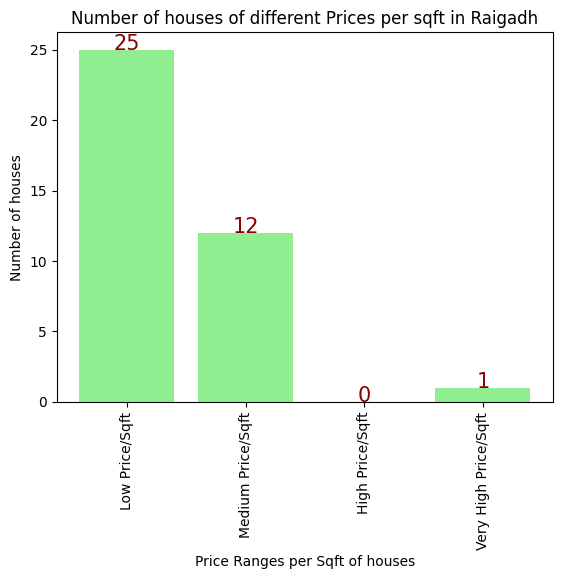

In [17]:
for index1 in range(0, len(Regions)):

    low_price_sqft = 0
    medium_price_sqft = 0
    high_price_sqft = 0
    very_high_price_sqft = 0

    price_sqft = DataFrames[index1]['price_sqft'].to_list()

    mean_price_sqft = np.mean(price_sqft)
    std_price_sqft = np.std(price_sqft)

    for index2 in range(0, len(price_sqft)):
        if price_sqft[index2] <= 5000:
            low_price_sqft += 1
        elif (price_sqft[index2] > 5000) and (price_sqft[index2] <= 10000):
            medium_price_sqft += 1
        elif (price_sqft[index2] > 10000) and (price_sqft[index2] <= 15000):
            high_price_sqft += 1
        else:
            very_high_price_sqft += 1

    price_sqft_categories = ['Low Price/Sqft', 'Medium Price/Sqft', 'High Price/Sqft', 'Very High Price/Sqft']

    frequency = [low_price_sqft, medium_price_sqft, high_price_sqft, very_high_price_sqft]

    print('Bar plot for the number of houses in different price/sqft ranges in Region ' + Regions[index1] + ' :-')

    print('Mean price/sqft in ' + Regions[index1] + ' is ' + str(round(mean_price_sqft)) + ' Rupees')

    print('Deviation in price/sqft in ' + Regions[index1] + ' is ' + str(round(std_price_sqft)) + ' Rupees')
    #plt.figure(figsize=(10,8))
    plt.bar(price_sqft_categories, frequency, color='lightgreen')

    plt.xlabel('Price Ranges per Sqft of houses')

    plt.xticks(rotation=90)

    plt.ylabel('Number of houses')

    plt.title('Number of houses of different Prices per sqft in ' + Regions[index1])

    for index2 in range(len(price_sqft_categories)):
        plt.text(index2, frequency[index2], frequency[index2], ha='center', color='darkred',size=15)

    plt.show()

In [18]:
from IPython.display import clear_output

location = input('Hello! Let me help you find a house! Which is your preferred Location ?')
Locations = df['Location'].to_list()
found = False

for i in range(len(Locations)):
    if(Locations[i] == location):
        found = True

if(found):
    df_temp = df[df['Location'] == location]
    print("These are the available options for you :- ")
    display(df_temp)
else:
    print("Oops! No results found.")



no_of_BHK = input('How many BHK house do you want?')
df_temp = df_temp[df_temp['BHK'] == no_of_BHK]

if len(df_temp['BHK'].to_list()) > 0:
    clear_output()
    print('You have the following options :-')
    display(df_temp)
else:
    clear_output()
    print("Oops! No results found")



price_limit = float(input('What is your price limit?(in Cr)'))

if(np.min(df_temp['price_in_Cr']) <= price_limit):
    df_temp = df_temp[df_temp['price_in_Cr'] <= price_limit]
    clear_output()
    print('There you go!')
    display(df_temp)
else:
    clear_output()
    print("Oops! No results found")

There you go!


,BHK,project,Location,Total sqft,price_sqft,price_in_Cr
69,3,SHREE KRISHNA SangamChembur,Chembur,917,31000,2.84
1618,3,Sandu ShilpadattaChembur,Chembur,1005,27888,2.80
1619,3,Sandu ShilpadattaChembur,Chembur,1005,27888,2.80
2813,3,0,Chembur,1050,28571,3.00
2814,3,0,Chembur,1000,30000,3.00
